# Figuring out most unusual segments in time series
- First let's import the necessary libraries and load the dataset
- You need to amend the `sys.path.append` commands below so the notebook can find them.
- We use the dataset from file `synth_time_data` but you can just change variable `df` to your data

In [1]:
import os, sys
import numpy as np
import pandas as pd

root_path = os.path.realpath('../..')
print(root_path)

# this assumes that all of the following files are checked in the same directory
sys.path.append(os.path.join(root_path,"wise-pizza"))

# create data-related directories
data_dir = os.path.realpath(os.path.join(root_path, 'wise-pizza/data'))
if not os.path.isdir(data_dir):
    os.mkdir(data_dir)
print(data_dir)

from wise_pizza import explain_timeseries

df = pd.read_csv(os.path.join(data_dir, "synth_time_data.csv"))  # replace this variable with your data

/Users/alexander.polyakov/Desktop
/Users/alexander.polyakov/Desktop/wise-pizza/data


In [2]:
# this makes the notebook expand to full width of the browser window
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/var/folders/g1/s15bgzz12434wvvk2kcyf8tr0000gq/T/ipykernel_79831/3308931027.py:2: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [3]:
%%javascript

// turn off scrollable windows for too large output
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [5]:
# False if you want nice interactive plots
# True if you want static plots
plot_is_static = False

In [6]:
dims = ["PRODUCT", "REGION", "SOURCE_CURRENCY", "TARGET_CURRENCY"] # dimensions to find segments
totals = 'VOLUME'  # value to analyze
size = 'ACTIVE_CUSTOMERS'  # number of objects
time = "DATE"

# Finding the juiciest slices

**explain_timeseries**: Find the most unusual segments in the timeseries

- `df`: Dataset
- `dims`: List of discrete dimensions
- `total_name`: Name of column that contains totals per segment
- `size_name`: Name of column containing segment sizes
- `min_segments`: Minimum number of segments to find
- `max_segments`: Maximum number of segments to find, defaults to min_segments
- `min_depth`: Minimum number of dimension to constrain in segment definition
- `max_depth`: Maximum number of dimension to constrain in segment definition
- `solver`: If this equals to "lp" uses the LP solver, else uses the (recommended) Lasso solver
    - `"lasso"`: Lasso-based finder of unusual segments
    - `"lp"`: LP-based finder of unusual segments
- `cluster_values`: In addition to single-value slices, consider slices that consist of a
    group of segments from the same dimension with similar naive averages
    - `True`: to use cluster values, you can them using `sf.relevant_cluster_names`
    - `False`: to use simple segments
- `verbose`: If set to a truish value, lots of debug info is printed to console, also you can check progressbar
    - `True`: to get info
    - `False`: to get result without info
    
    
- Use `.plot()` to see the plot after fitting:
    - `plot_is_static`: static (True) or dynamic (False) plotly result
        - `True`: to get static plots (Doesn't work on all platforms yet)
        - `False`: to get dynamic plots
    - `width`: to change the width of the plot
    - `height`: to change the height of the plot

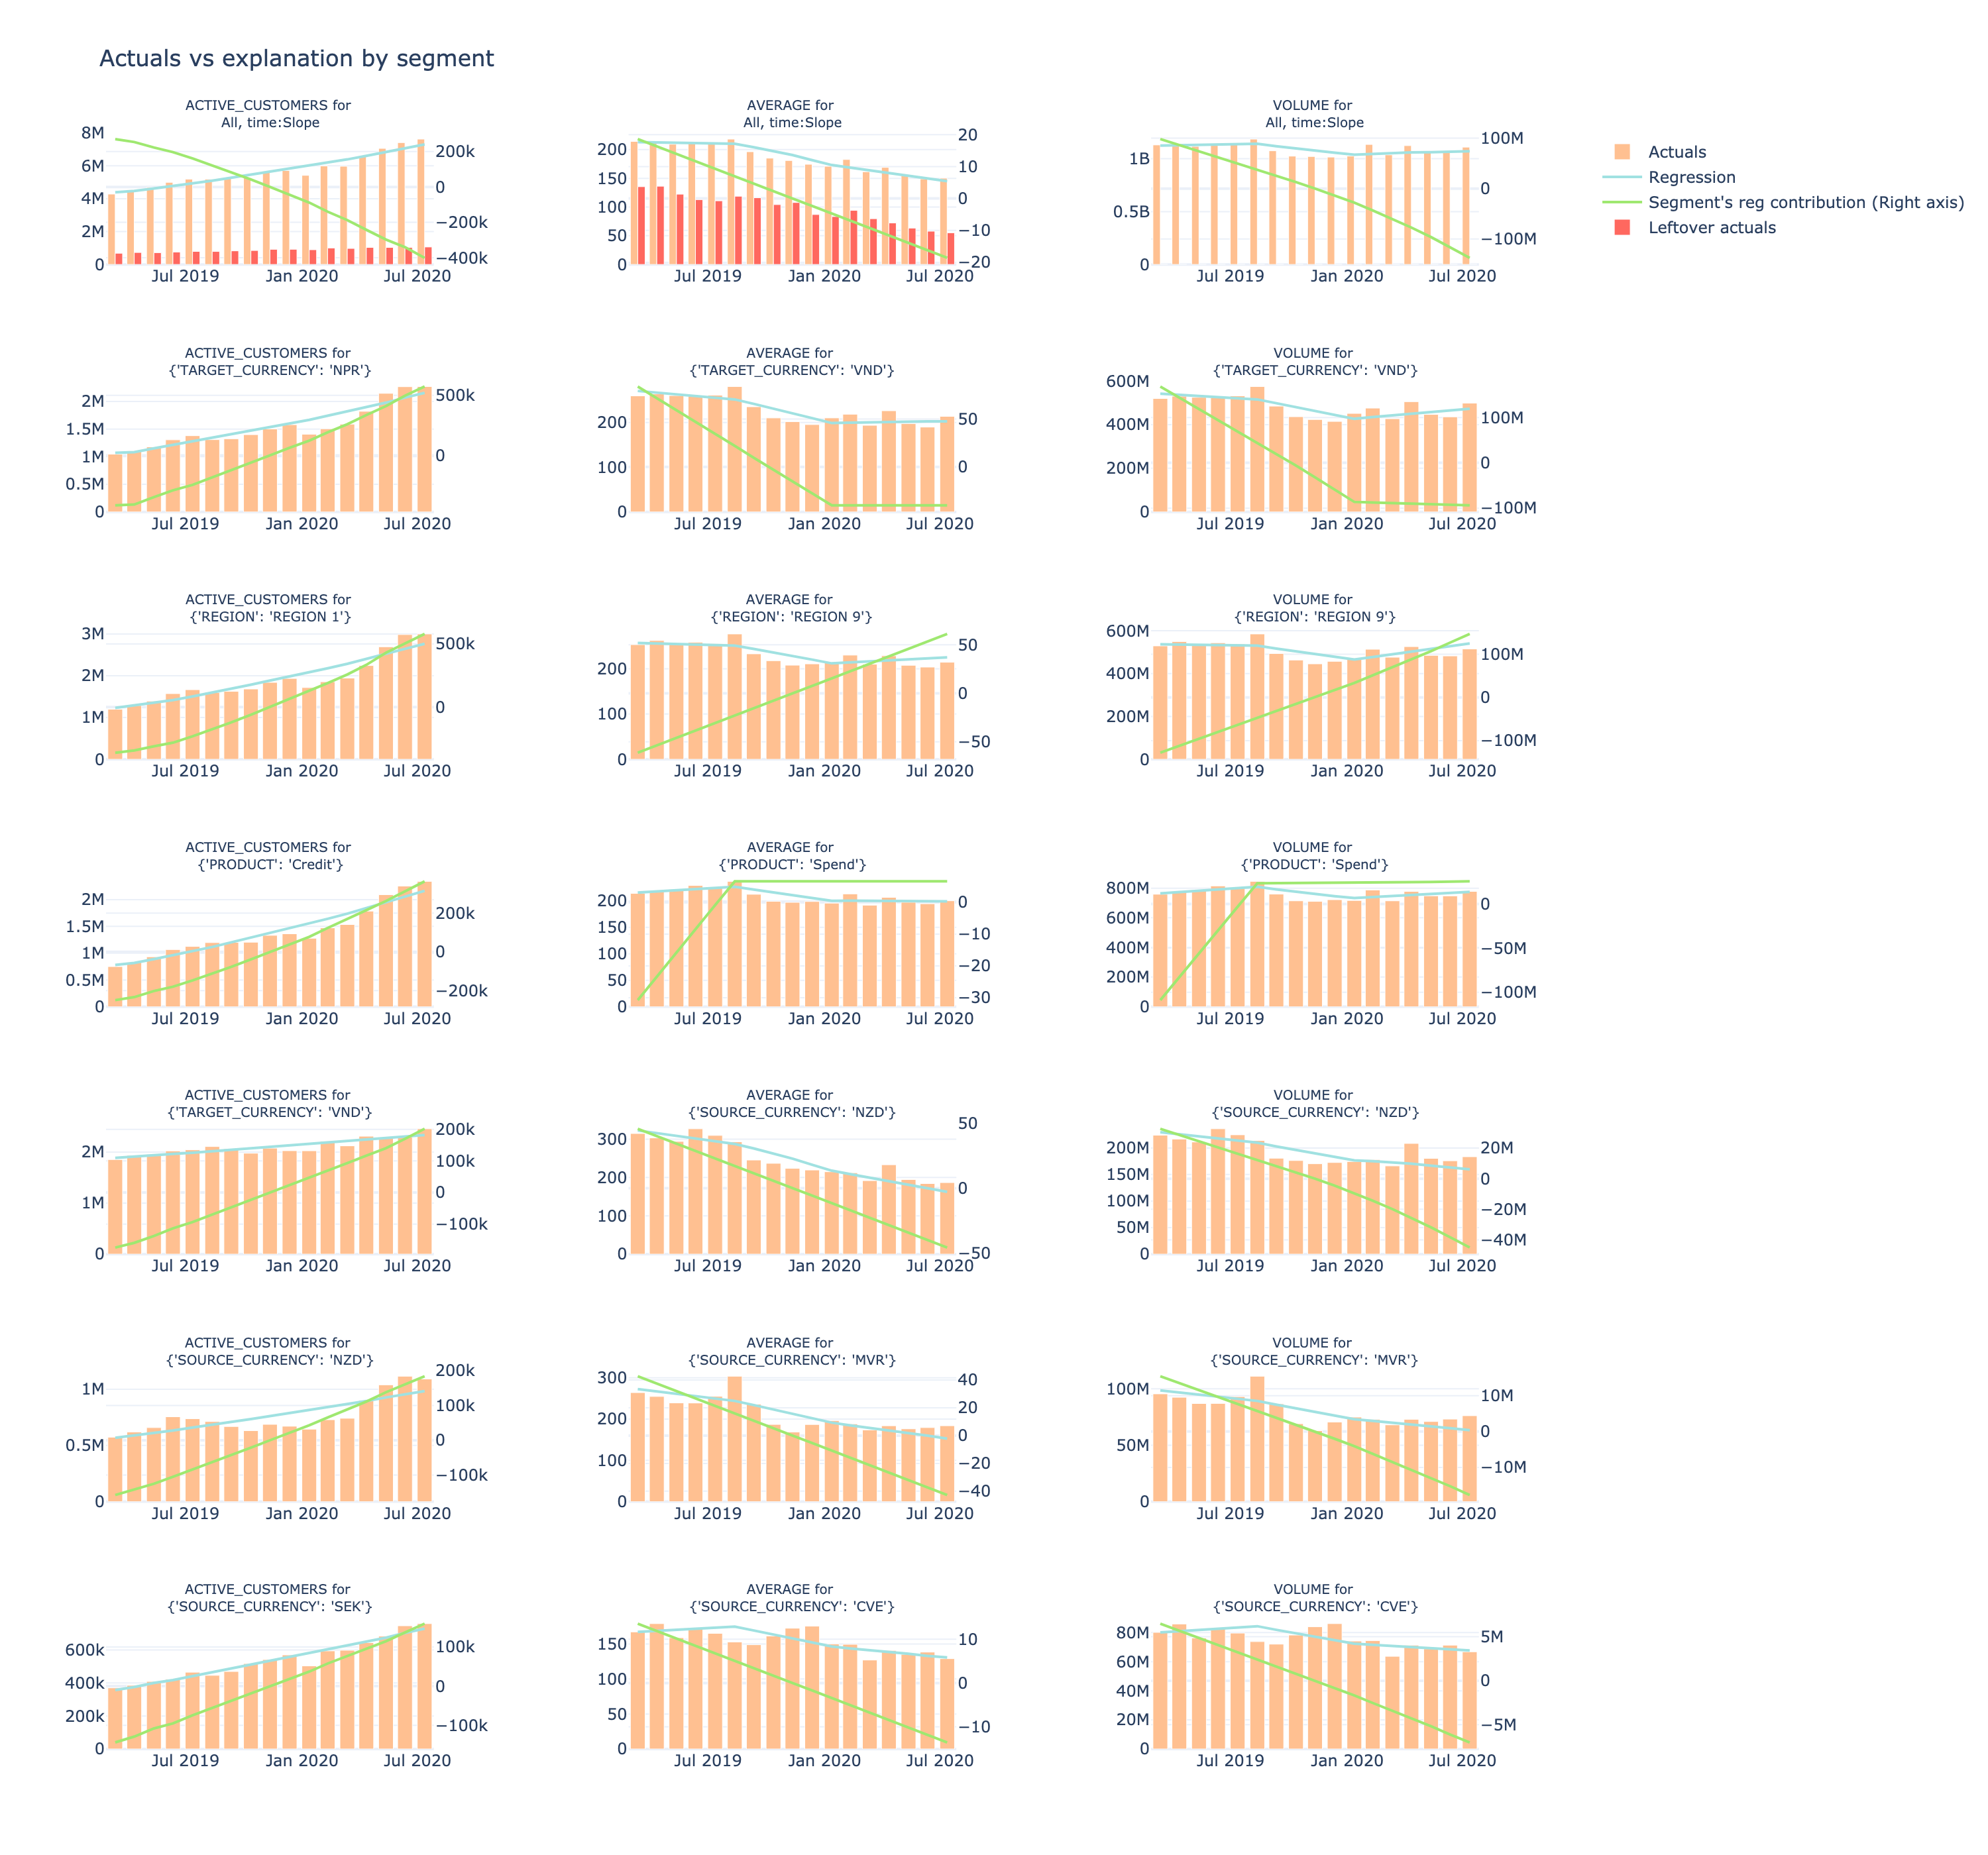

In [7]:
sf = explain_timeseries(
    df=df,
    dims=dims,
    min_segments=7,
    min_depth=1,
    max_depth=1,
    total_name=totals,
    size_name=size,
    time_name=time,
    verbose=False,
    cluster_values=False,
)
sf.plot(plot_is_static=True, height=1400, width=1500, average_name='AVERAGE')